In [36]:
import time
import  math
import numpy as np
from numpy.linalg import inv
import numpy.linalg as npl
import numpy.random as npr
import pandas as pd
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import linalg
from scipy.sparse import diags
from sympy import *
import sympy as sym
sym.init_printing()
from IPython.display import display, Math

In [37]:
from methods import jacobi, sor, gauss_seidel, gauss_elimination
from check_matrix import characteristics, isDDM

In [38]:
from scipy.sparse import random
from scipy.stats import rv_continuous
from numpy.random import default_rng

class CustomDistribution(rv_continuous):
    def _rvs(self,  size=None, random_state=None):
        return random_state.standard_normal(size)

In [39]:
n = 10
#A =  np.random.uniform(low=-30, high=30, size=(n,n))
b = np.random.uniform(low=-10, high=10, size=(n,))

In [40]:
def create_mat(n,add=10):
    rng = default_rng()
    X = CustomDistribution(seed=rng)
    Y = X()  # get a frozen version of the distribution
    S = random(n, n, density=0.75, random_state=rng, data_rvs=Y.rvs)
    A = S.A

    A[0][0] += add/2
    A[n-1][n-1] +=add/2
    for i in range(n):
        for j in range(n):
            if i == j:
                A[i][j]+= add

    return A*10

In [41]:
n = 10
iter = 10000

A = create_mat(n,10)
b = np.random.uniform(low=-10, high=10, size=(n,))

In [42]:
time_list = []
iter_list = []

In [43]:
for n in range(4,100,1):
    A = create_mat(n,30)
    b = np.random.uniform(low=-10, high=10, size=(n,))

    if  characteristics(A) == 0:
        A = create_mat(n,10)
        print("bin raus")
        continue

    if isDDM(m=A,n=n):
        true_sol = npl.solve(A, b)
        jac_erg, jacobi_time, k_jacobi = jacobi(A,b, iter=iter)
        gauss_seidel_erg, gauss_seidel_time, k_gauss_seidel = gauss_seidel(A, b, iter=iter)
        sor_erg, sor_time, k_sor = sor(A, b, w_in=None, iter=iter)
        gauss_elim_erg, gauss_elim_time = gauss_elimination(A,b)

        time_list.append([ jacobi_time, gauss_seidel_time, sor_time, gauss_elim_time ])
        iter_list.append([n,int(k_jacobi), k_gauss_seidel, k_sor])



Spektralradius der Jacobi-Matrix: 0.07283725969674161
w = 1.0013298465407166
gerechnet
Spektralradius der Jacobi-Matrix: 0.0756101436248433
w = 1.0014333234699933
gerechnet
Spektralradius der Jacobi-Matrix: 0.10403402382980124
w = 1.0027205117098321
gerechnet
Spektralradius der Jacobi-Matrix: 0.1308700618548445
w = 1.004318807183162
gerechnet
Spektralradius der Jacobi-Matrix: 0.11115397471852376
w = 1.0031080315464838
gerechnet
Spektralradius der Jacobi-Matrix: 0.1292563378660025
w = 1.0042120601899855
gerechnet
Spektralradius der Jacobi-Matrix: 0.15707465498618917
w = 1.0062453970109824
gerechnet
Spektralradius der Jacobi-Matrix: 0.1483684252093321
w = 1.005564716393779
gerechnet
Spektralradius der Jacobi-Matrix: 0.15319260547593064
w = 1.0059368634630206
gerechnet
Spektralradius der Jacobi-Matrix: 0.19314364576468518
w = 1.0095042346149508
gerechnet
Spektralradius der Jacobi-Matrix: 0.1900551787343561
w = 1.0091971108680162
gerechnet
Spektralradius der Jacobi-Matrix: 0.16735581176039

In [53]:
A

array([[461.10337936,  -3.17977462,  -4.95410964, ...,  -3.15694199,
          6.81869154,  27.41653804],
       [-10.00120131, 308.0458119 ,  19.61749112, ...,   5.07862287,
          4.91683631,  -6.36405571],
       [-17.35283281,   0.        , 300.        , ...,   9.96817264,
         -3.52901796,   2.71086759],
       ...,
       [  5.02444783,   0.        ,  23.68077772, ..., 299.31998776,
         -2.14972667,   0.        ],
       [  0.        ,   0.        ,   1.42292164, ...,   3.77174183,
        298.44301656,   4.70557739],
       [  6.53126531,   0.66616962,   0.        , ...,   4.85972704,
          0.        , 438.82075319]])

In [51]:
print(iter_list)

[[4, 1, 1, 1], [5, 1, 1, 1], [6, 1, 1, 1], [7, 0, 0, 0], [8, 1, 1, 1], [9, 0, 0, 0], [10, 1, 1, 1], [11, 1, 1, 1], [12, 1, 1, 1], [13, 1, 0, 0], [14, 0, 0, 0], [15, 1, 1, 1], [16, 0, 0, 0], [17, 1, 1, 1], [18, 1, 1, 1], [19, 1, 1, 1], [20, 1, 1, 1], [21, 1, 1, 1], [22, 0, 1, 1], [23, 0, 0, 0], [24, 0, 0, 0], [25, 1, 0, 0], [26, 0, 0, 0], [27, 1, 0, 0], [28, 0, 0, 0], [29, 1, 1, 1], [30, 0, 0, 0], [31, 0, 1, 1], [32, 0, 1, 1], [33, 0, 0, 0], [34, 1, 0, 0], [35, 0, 0, 0], [36, 0, 1, 1], [37, 1, 1, 1]]


In [45]:
true_sol = npl.solve(A, b)

iter = 10000
jac_erg, jacobi_time, k_jacobi = jacobi(A,b, iter=iter)
gauss_seidel_erg, gauss_seidel_time, k_gauss_seidel = gauss_seidel(A, b, iter=iter)
sor_erg, sor_time, k_sor = sor(A, b, w_in=None, iter=iter)

gauss_elim_erg, gauss_elim_time = gauss_elimination(A,b)

jac_erg.append(true_sol)
gauss_seidel_erg.append(true_sol)
sor_erg.append(true_sol)

time_df = pd.DataFrame(columns=["Jacobi", "Gauss Seidel", "SOR", "Gauss Eliminierung"])
time_df.loc[0]=[ jacobi_time, gauss_seidel_time, sor_time, gauss_elim_time ]
time_df.loc[1]=[ int(k_jacobi), k_gauss_seidel, k_sor, 0.0]
time_df.index = ["Zeit (sek)", "Iterrationen"]

time_df.loc["Iterrationen"] = time_df.loc["Iterrationen"].astype(float).astype(int)

time_df

Spektralradius der Jacobi-Matrix: 0.5661395855429644
w = 1.096305271172236


,Jacobi,Gauss Seidel,SOR,Gauss Eliminierung
Zeit (sek),0.0000s,0.0000s,0.0000s,0.0000s
Iterrationen,0,0,0,0


In [46]:
#gauss_seidel_erg[len(gauss_seidel_erg)-2]

In [47]:
l1, l2, l3,l4, la = symbols("x1 x2 x3 x.. x")
l = Matrix([l1,l2,l3,l4])
r = Matrix(b)
a = Matrix(A)
#display(Math('\ \\text{  }%s   \\text{*} %s \\text{= } %s' % (sym.latex(sym.simplify(a)) , (sym.latex(sym.simplify(l))), (sym.latex(sym.simplify(r)))  ))   )

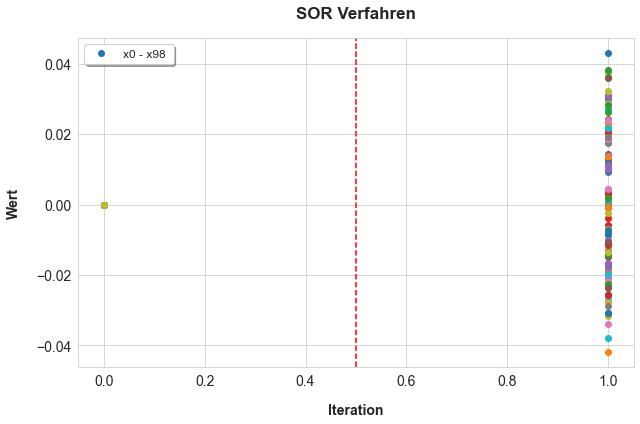

In [48]:
label = [f'x{i}' for i in range(0,n)]
label = [f'x0 - x{n-1} ']
plt.figure(figsize=(9,6))
plt.plot(sor_erg,linestyle='',marker='o')
plt.axvline(x=k_sor+0.5,linestyle='--',c='red')

plt.title('SOR Verfahren', fontweight='bold', fontsize=17, pad=20)

plt.xticks(rotation='0', fontsize=14)
plt.yticks(rotation='0', fontsize=14)
plt.xlabel('Iteration', fontsize=14, labelpad=15, weight ='bold')
plt.ylabel('Wert', fontsize=14, labelpad=15, weight ='bold')
plt.legend(labels = label,frameon=True,loc='best', shadow=True, fontsize="large")
plt.tight_layout(h_pad=3.0)
plt.grid(True)
plt.show()

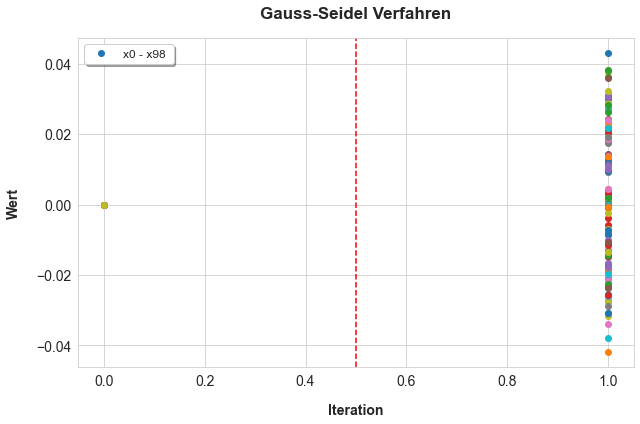

In [49]:
plt.figure(figsize=(9,6))
plt.plot(gauss_seidel_erg,linestyle='',marker='o')
plt.axvline(x=k_gauss_seidel+0.5,linestyle='--',c='red')

plt.title('Gauss-Seidel Verfahren', fontweight='bold', fontsize=17, pad=20)
plt.xticks(rotation='0', fontsize=14)
plt.yticks(rotation='0', fontsize=14)
plt.xlabel('Iteration', fontsize=14, labelpad=15, weight ='bold')
plt.ylabel('Wert', fontsize=14, labelpad=15, weight ='bold')
plt.legend(labels = label,frameon=True,loc='best', shadow=True, fontsize="large")
plt.tight_layout(h_pad=3.0)
plt.grid(True)
plt.show()

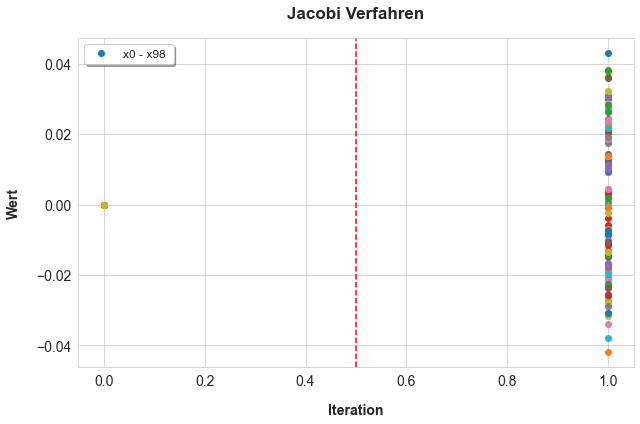

In [50]:
plt.figure(figsize=(9,6))
plt.plot(jac_erg,linestyle='',marker='o')
plt.axvline(x=k_jacobi+0.5,linestyle='--',c='red')

plt.title('Jacobi Verfahren', fontweight='bold', fontsize=17, pad=20)
plt.xticks(rotation='0', fontsize=14)
plt.yticks(rotation='0', fontsize=14)
plt.xlabel('Iteration', fontsize=14, labelpad=15, weight ='bold')
plt.ylabel('Wert', fontsize=14, labelpad=15, weight ='bold')
plt.legend(labels = label,frameon=True,loc='best', shadow=True, fontsize="large")
plt.tight_layout(h_pad=3.0)
plt.grid(True)
plt.show()

Ideen: LGS von n = 2 bis n = 6 mio

Plot: Fehler, Wert,